<a href="https://colab.research.google.com/github/ChicagoPark/Machine_Learning_Assignment/blob/main/HW2_20161309_%EB%B0%95%EC%98%81%EC%9D%BC_AutoEnc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##` 본 Colab HW2 Autoencoder 목차`


#### 1.   필요 모듈 및 Iris Data Loading
#### 2. PCA 를 이용한 차원 축소
#### 3.   Autoencoder code
#### 4. Stacked Autoencoder code

###` 추가 섹션`

1.   Shallow Autoencoder with Linear activation


# `1.1. 필요한 모듈 가져오기`

In [46]:
# 필요 모듈 가져오기

#####데이터 로딩 및 Plot 을 위한 모듈######
import numpy as np
import matplotlib.pyplot as plt             # plotting 을 위한 모듈
from mpl_toolkits.mplot3d import Axes3D     # 3D 상에 표현하기 위한 모듈
from sklearn import decomposition           # PCA 를 사용하기 위한 모듈
from sklearn import datasets                # Iris dataset 을 이용


#####뉴럴네트워크 모델링을 위한 모듈######
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils.vis_utils import plot_model # 모델의 구조를 시각화

#` 1.2. Iris Data Loading 하기`

In [47]:
%%capture
# iris dataset 을 불러온다.
iris = datasets.load_iris()
X = iris.data                           # x 가 4차원인 데이터이다.
y = iris.target                         # 이후 단지 대조를 위해서 가져온다.

# encoder decoder 를 훈련하고, 그 과정에서 검증을 하기위한 데이터셋 분류작업을 수행한다.
i = np.random.permutation(len(iris.data))
X_train = X[i[:-10]]
y_train = y[i[:-10]]
X_test = X[i[-10:]]
y_test = y[i[-10:]]

#`2. PCA 를 활용한 차원 축소`

*2차원 상의 Plotting*


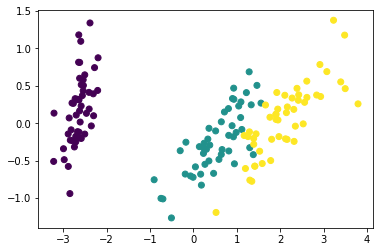

*3차원 상의 Plotting*


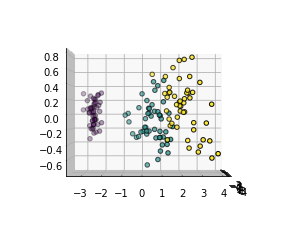

In [48]:
# 오토 인코더와의 비교를 위한 PCA 실습 코드
pca = decomposition.PCA(n_components=3) # 3차원이 목적이니, 3으로 설정
pca.fit(X)                              # pca 수행을 fit 으로 수행한다. 이때 3개의 축을 찾는 작업 수행

# 3개의 축을 찾은 후 x 축에 투영을 시켜 보는 코드
Xp = pca.transform(X)

print("*2차원 상의 Plotting*")
plt.scatter(Xp[:,0], Xp[:,1], c=y.astype(float))
plt.show()

print("*3차원 상의 Plotting*")
# figure 를 그릴 준비를 한다.
fig = plt.figure(1, figsize = (4, 3))
# 보기 좋게 하기위해 세팅
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=0, azim=0)

# scatter plot 을 통해서 그려보도록 합시다.
# 아래 코드를 통해 Iris 데이터 셋에서 최적의 축을 계산하여 그 중 상위 3개를 가져온것이다.
ax.scatter(Xp[:,0],Xp[:,0],Xp[:,2], c=y, edgecolor='k')  # c = y 로 설정하여 레이블 별로 다른 색으로 표현할 수 있도록한다.

# `3. 단순한 오토인코더`

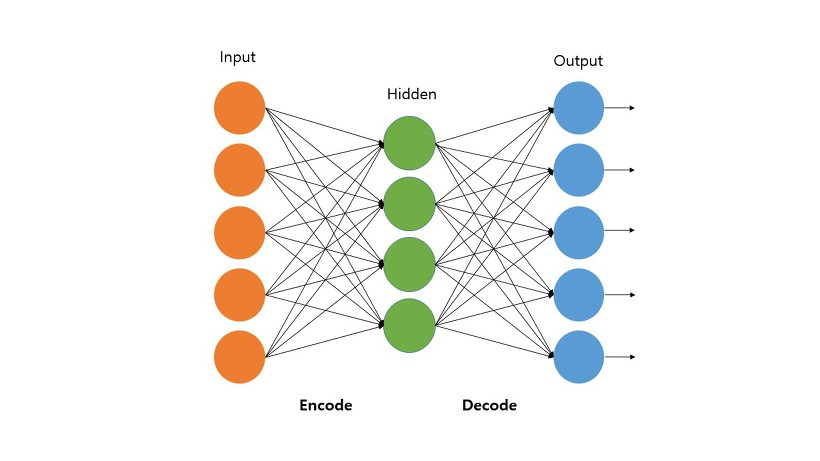

In [49]:
# 층별 노드의 수를 정의
input_dim = 4
# encoding 목표로 하는 차원은 3차원이므로 3으로 은닉층 노드 수를 결정
encoding_dim = 3
# 입력데이터와 비교를 하기위한 출력층
output_dim = 4

# 모델의 입력 층 정의
input = Input(shape=(input_dim,))
# 히든층 정의
encoding = Dense(encoding_dim, activation='elu',
                 kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.926, maxval=0.926))(input)
# 출력 층 정의
decoding = Dense(output_dim, activation='elu',
                 kernel_initializer=tf.keras.initializers.RandomUniform(minval=-0.926, maxval=0.926))(encoding)

# 오토인코더
simple_autoencoder = Model(input, decoding)

# 이후 차원 축소에 사용이 되는 encoding 작업을 하는 모델 부분을 추출하자. 위 사진에서 좌측 부분과 같다.
simple_encoder = Model(input, encoding)

simple_autoencoder.compile(loss='mean_squared_error', optimizer='adam')

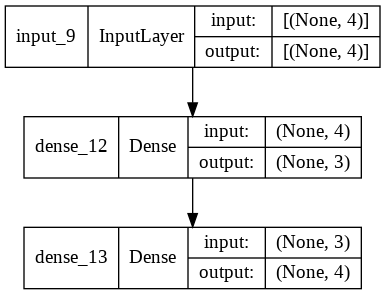

In [50]:
# autoencoder 모델 시각화
plot_model(simple_autoencoder, show_shapes=True)

In [51]:
%%capture
simple_history = simple_autoencoder.fit(X_train, X_train, # 입력 데이터가 곧 label 과 같은 것을 확인 가능
                    epochs=150,
                    batch_size=4,
                    shuffle=True,
                    validation_data=(X_test, X_test))

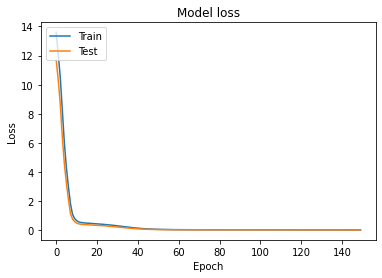

In [52]:
plt.plot(simple_history.history['loss'])
plt.plot(simple_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
# 훈련한 오토인코더 모델에서 encoder 부분에 입력값을 넣었을때 나오는 값을 받아온다.
simple_encoded_dataset = simple_encoder.predict(X)

*2차원 상의 Plotting*


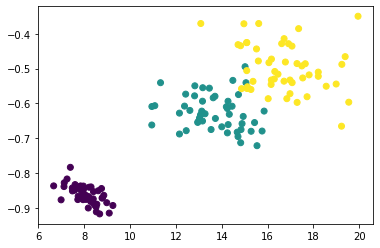

*3차원 상의 Plotting*


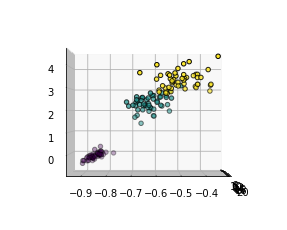

In [54]:
print("*2차원 상의 Plotting*")
plt.scatter(simple_encoded_dataset[:,0], simple_encoded_dataset[:,1], c=y.astype(float))
plt.show()

print("*3차원 상의 Plotting*")

# 3차원 figure 를 그릴 준비를 한다.
fig = plt.figure(1, figsize = (4, 3))

# 3차원 시각화를 위한 준비
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=0, azim=0)

# 3차원 상에 결과 그리기
ax.scatter(simple_encoded_dataset[:,0],simple_encoded_dataset[:,1],simple_encoded_dataset[:,2], c=y, edgecolor='k')  # c = y 로 설정하여 레이블 별로 다른 색으로 표현할 수 있도록한다.

#` 4.1. 적층오토인코더`

In [55]:
# 훈련한 encoder 부분에 입력값을 넣었을때 나오는 값(h)을 받아온다.
middle_dataset = simple_encoder.predict(X)

middle_train = simple_encoder.predict(X_train)

middle_test = simple_encoder.predict(X_test)

In [56]:
input = Input(shape=(input_dim,))

# 훈련시켰던 simple_encoder 를 가져온다.
encoding1 = simple_encoder(input)
# 적층할 층에대한 명시를 해준다.
encoding2 = Dense(encoding_dim, activation='elu',
                  kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1))(encoding1)

stacked_encoder = Model(input, encoding2)
# 이전 예비학습 층을 훈련대상에서 제외하기위해 freezing 해준다.
stacked_encoder.layers[1].trainable = False

# 모델의 loss 와 optimizer 설정
stacked_encoder.compile(loss='mean_squared_error', optimizer='adam')
stacked_encoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4)]               0         
                                                                 
 model_13 (Functional)       (None, 3)                 15        
                                                                 
 dense_14 (Dense)            (None, 3)                 12        
                                                                 
Total params: 27
Trainable params: 12
Non-trainable params: 15
_________________________________________________________________


In [57]:
%%capture
# 훈련을 진행 X_train 값에 대해 나오는 값이 결국 middle_train 이므로 실질적으로 freezing 되지 않은 부분의 입력부분 출력부분의 목표는 같다.
stacked_history = stacked_encoder.fit(X_train, middle_train,
                    epochs=150,
                    batch_size=4,
                    shuffle=True,
                    validation_data=(X_test, middle_test))

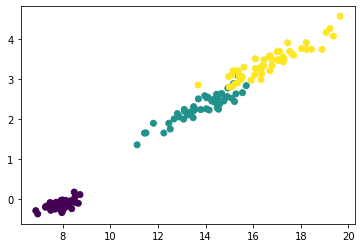

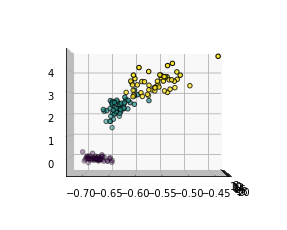

In [58]:
# 훈련시킨 모델의 결과를 얻어오는 단계
stacked_dataset = stacked_encoder.predict(X)

# 2차원 plotting
plt.scatter(stacked_dataset[:,0], stacked_dataset[:,2], c=y.astype(float))
plt.show()

# 3차원 figure 를 그릴 준비를 한다.
fig = plt.figure(1, figsize = (4, 3))
# 3차원 시각화를 위한 준비
stacked_ax = Axes3D(fig, rect=[0,0,0.95,1], elev=0, azim=0)
# 3차원 상에 결과 그리기
stacked_ax.scatter(stacked_dataset[:,0],stacked_dataset[:,1],stacked_dataset[:,2], c=y, edgecolor='k')  # c = y 로 설정하여 레이블 별로 다른 색으로 표현할 수 있도록한다.

#` 4.2. 적층 인코더 에 Layer 추가`

In [59]:
# 훈련한 오토인코더 모델에서 encoder 부분에 입력값을 넣었을때 나오는 값을 받아온다.
second_middle_dataset = stacked_encoder.predict(X)

second_middle_train = stacked_encoder.predict(X_train)
second_middle_test = stacked_encoder.predict(X_test)

In [60]:
# 설명은 4.1. 의 설명과 정확하게 중복된다.
input = Input(shape=(input_dim,))

encoding1 = stacked_encoder(input)
encoding2 = Dense(encoding_dim, activation='elu', kernel_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1, seed=None))(encoding1)

second_stacked_encoder = Model(input, encoding2)

second_stacked_encoder.layers[1].trainable = False
second_stacked_encoder.compile(loss='mean_squared_error', optimizer='adam')
second_stacked_encoder.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 4)]               0         
                                                                 
 model_14 (Functional)       (None, 3)                 27        
                                                                 
 dense_15 (Dense)            (None, 3)                 12        
                                                                 
Total params: 39
Trainable params: 12
Non-trainable params: 27
_________________________________________________________________


In [61]:
%%capture
# 훈련을 진행 X_train 값에 대해 나오는 값이 결국 second_middle_train 이므로 실질적으로 freezing 되지 않은 부분의 입력부분 출력부분의 목표는 같다.
second_stacked_history = second_stacked_encoder.fit(X_train, second_middle_train,
                    epochs=150,
                    batch_size=4,
                    shuffle=True,
                    validation_data=(X_test, second_middle_test))

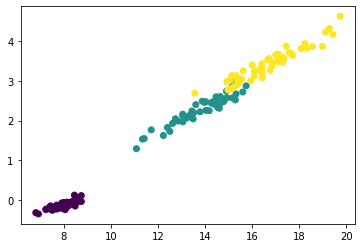

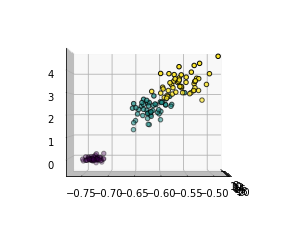

In [62]:
# 훈련한 오토인코더 모델에서 encoder 부분에 입력값을 넣었을때 나오는 값을 받아온다.
second_stacked_dataset = second_stacked_encoder.predict(X)
# 2차원 plotting
plt.scatter(second_stacked_dataset[:,0], second_stacked_dataset[:,2], c=y.astype(float))
plt.show()

# figure 를 그릴 준비를 한다.
fig = plt.figure(1, figsize = (4, 3))
# 보기 좋게 하기위해 세팅
second_stacked_ax = Axes3D(fig, rect=[0,0,0.95,1], elev=0, azim=0)

# scatter plot 을 통해서 그려보도록 합시다.
# 아래 코드를 통해 Iris 데이터 셋에서 최적의 축을 계산하여 그 중 상위 3개를 가져온것이다.
second_stacked_ax.scatter(second_stacked_dataset[:,0],second_stacked_dataset[:,1],second_stacked_dataset[:,2], c=y, edgecolor='k')  # c = y 로 설정하여 레이블 별로 다른 색으로 표현할 수 있도록한다.

# 추가] Shallow Autoencoder with Linear activation

In [75]:
# 층별 노드의 수를 정의
input_dim = 4
# encoding 목표로 하는 차원은 3차원이므로 3으로 은닉층 노드 수를 결정
encoding_dim = 3
# 입력데이터와 비교를 하기위한 출력층
output_dim = 4

# 모델의 입력 층 정의
input = Input(shape=(input_dim,))
# 히든층 정의
encoding = Dense(encoding_dim, activation='linear')(input)
# 출력 층 정의
decoding = Dense(output_dim, activation='linear')(encoding)

# 오토인코더
linear_simple_autoencoder = Model(input, decoding)

# 이후 차원 축소에 사용이 되는 encoding 작업을 하는 모델 부분을 추출하자. 위 사진에서 좌측 부분과 같다.
linear_simple_encoder = Model(input, encoding)

linear_simple_autoencoder.compile(loss='mean_squared_error', optimizer='sgd')

In [76]:
%%capture
linear_simple_history = simple_autoencoder.fit(X_train, X_train, # 입력 데이터가 곧 label 과 같은 것을 확인 가능
                    epochs=50,
                    batch_size=1,
                    shuffle=True,
                    validation_data=(X_test, X_test))

*2차원 상의 Plotting*


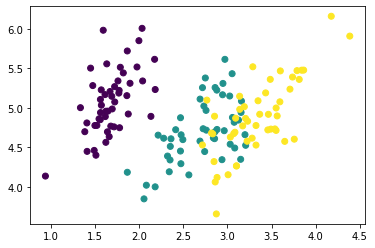

*3차원 상의 Plotting*


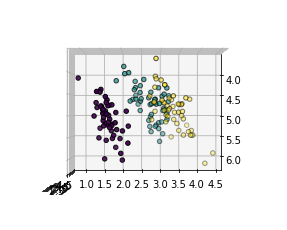

In [77]:
linear_simple_encoded_dataset = linear_simple_encoder.predict(X)

print("*2차원 상의 Plotting*")
plt.scatter(linear_simple_encoded_dataset[:,1], linear_simple_encoded_dataset[:,0], c=y.astype(float))
plt.show()

print("*3차원 상의 Plotting*")
# figure 를 그릴 준비를 한다.
fig = plt.figure(1, figsize = (4, 3))
# 보기 좋게 하기위해 세팅
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=90, azim=0)

# scatter plot 을 통해서 그려보도록 합시다.
# 아래 코드를 통해 Iris 데이터 셋에서 최적의 축을 계산하여 그 중 상위 3개를 가져온것이다.
ax.scatter(linear_simple_encoded_dataset[:,0],linear_simple_encoded_dataset[:,1],linear_simple_encoded_dataset[:,2], c=y, edgecolor='k')  # c = y 로 설정하여 레이블 별로 다른 색으로 표현할 수 있도록한다.